# Character metadata distribution

Note about metadata values: Categories that end with "err" (e.g. *grp_char/sclass_err* among social class values) arise for one of two reasons:
- The character was a group character and a single social value had not been assigned
- There was an error when matching the `<sp>` elements with the personography elements, which results in no social metadata available for a given speech turn

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
df_path = "overall-per-character-speech-postpro.tsv"

In [8]:
df = pd.read_csv(df_path)

In [9]:
df.head()

,speaker,gender,author,date,date_type,social_class,job,job_category,segment_number,play_short_name,genre,text
0,Ne Pierrot,M,August Lustig,1896.0,printed,NaN,NaN,NaN,0,lustig-am-letzte-maskebal,comedy,"'s isch Zit glaüb, liewer Domino,|||Ass mir uf..."
1,ne Domino,M,August Lustig,1896.0,printed,NaN,NaN,NaN,1,lustig-am-letzte-maskebal,comedy,Also bisch Dü g'hirothe denn?
2,Ne Pierrot,M,August Lustig,1896.0,printed,NaN,NaN,NaN,2,lustig-am-letzte-maskebal,comedy,"He, leider jo!... wenn ich sag « leider »,|||S..."
3,ne Domino,M,August Lustig,1896.0,printed,NaN,NaN,NaN,3,lustig-am-letzte-maskebal,comedy,"Das isch nitt mi!|||Das kenn ich nitt, was kun..."
4,Ne Pierrot,M,August Lustig,1896.0,printed,NaN,NaN,NaN,4,lustig-am-letzte-maskebal,comedy,"So hat's halt ebber schint's vergesse,|||Wo vo..."


## Column names

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28047 entries, 0 to 28046
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   speaker          28047 non-null  object 
 1   gender           28047 non-null  object 
 2   author           28047 non-null  object 
 3   date             27939 non-null  float64
 4   date_type        28047 non-null  object 
 5   social_class     10970 non-null  object 
 6   job              13387 non-null  object 
 7   job_category     13387 non-null  object 
 8   segment_number   28047 non-null  int64  
 9   play_short_name  28047 non-null  object 
 10  genre            28047 non-null  object 
 11  text             27877 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.6+ MB


## Proportion of not null values per field

In [69]:
df_not_empty_ratios = pd.DataFrame(
    list(zip(df.columns.tolist(), df.count().values, list(df.count()/len(df)))),
    columns=["field_name", "not_null", "not_null_ratio"])
#df_not_empty_ratios = df_not_empty_ratios.set_index('field_name')

In [70]:
df_not_empty_ratios

,field_name,not_null,not_null_ratio
0,speaker,28047,1.000000
1,gender,28047,1.000000
2,author,28047,1.000000
3,date,27939,0.996149
4,date_type,28047,1.000000
5,social_class,10970,0.391129
6,job,13387,0.477306
7,job_category,13387,0.477306
8,segment_number,28047,1.000000
9,play_short_name,28047,1.000000


[Text(0, 0, 'speaker'),
 Text(1, 0, 'gender'),
 Text(2, 0, 'author'),
 Text(3, 0, 'date'),
 Text(4, 0, 'date_type'),
 Text(5, 0, 'social_class'),
 Text(6, 0, 'job'),
 Text(7, 0, 'job_category'),
 Text(8, 0, 'segment_number'),
 Text(9, 0, 'play_short_name'),
 Text(10, 0, 'genre'),
 Text(11, 0, 'text')]

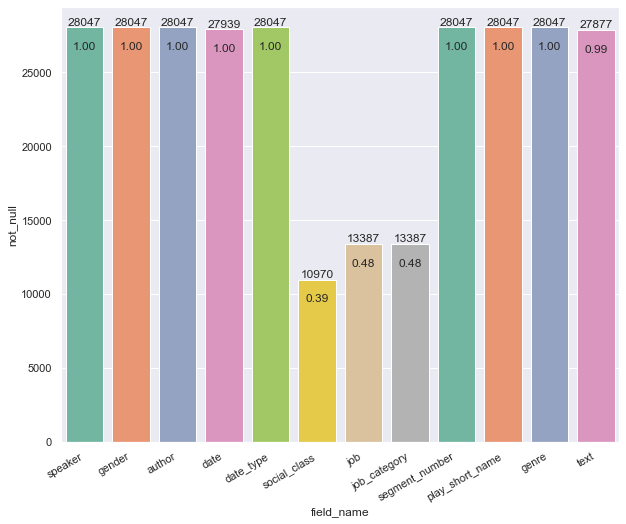

In [116]:
from matplotlib import pyplot as plt
sns.set_theme()
plt.subplots(figsize=(10,8))
ax = sns.barplot(data=df_not_empty_ratios, x='field_name', y='not_null', palette='Set2')
for idx, val in df_not_empty_ratios.iterrows():
    ax.text(idx-.25, df_not_empty_ratios.iloc[idx]['not_null']-1500, f"{val['not_null_ratio']:.2f}")
for ci in ax.containers:
    ax.bar_label(ci,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

## Character gender

In [12]:
df.gender.value_counts(dropna=False)

M                   19049
F                    8498
U                     313
grp_char/gdr_err      111
B                      76
Name: gender, dtype: int64

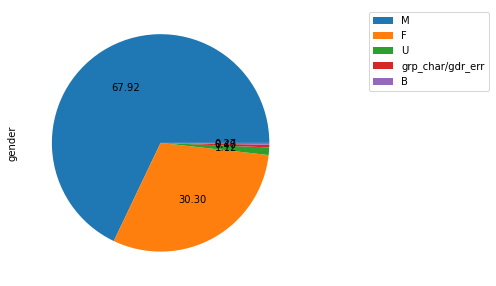

In [13]:
df.gender.value_counts().plot(kind='pie', figsize=(10,5), labels=None, autopct="%.2f").legend(loc='upper left', labels=df.gender.value_counts().index, bbox_to_anchor=(1.25, 1))

## Character professional categories

In [14]:
df.job_category.value_counts(dropna=False)

NaN                                   14660
professionals_scientific_technical     2390
service_and_sales                      2356
elementary_professions                 1924
government_executive_officials         1390
crafts                                 1288
rentiers                               1118
intermediate_professionals              874
agriculture                             723
industry_and_transportation             716
military                                237
grp_char/jcat_err                       148
associative_world                       131
clergy                                   92
Name: job_category, dtype: int64

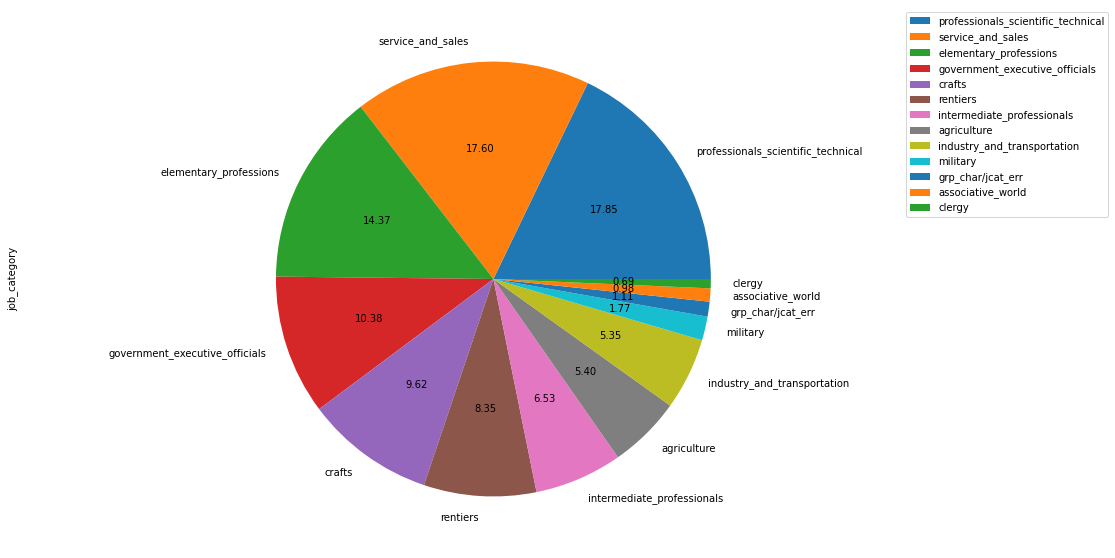

In [15]:
job_pie = df.job_category.value_counts().plot.pie(figsize=(20,10), autopct="%.2f")
job_pie.set_ylabel("job_category", labelpad=200)
job_pie.legend(loc='upper left', bbox_to_anchor=(1.25, 1))

## Character social class

In [16]:
df.social_class.value_counts(dropna=False)

NaN                    17077
lower_middle_class      4450
lower_class             2440
upper_class             2009
upper_middle_class      1868
grp_char/sclass_err      111
middle_class              92
Name: social_class, dtype: int64

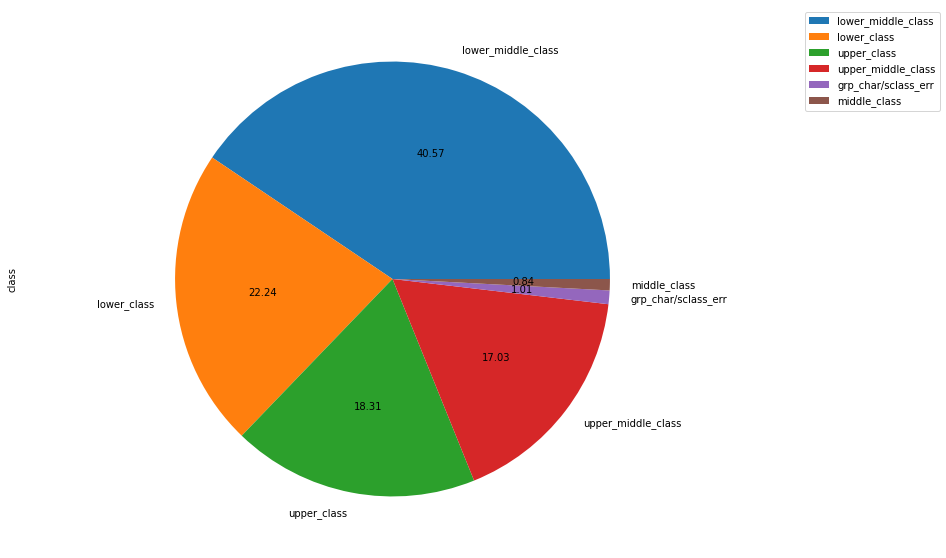

In [17]:
class_pie = df.social_class.value_counts().plot.pie(figsize=(20,10), autopct="%.2f")
class_pie.set_ylabel("class", labelpad=100)
class_pie.legend(loc='upper left', bbox_to_anchor=(1.25, 1))

## Character metadata by play genre

Within each genre, proportion of character of each gender, social class and professional category.

### Genre distribution

In [18]:
df.genre.value_counts(dropna=False)

comedy         18446
volksstueck     4740
drama           2600
tale            2261
Name: genre, dtype: int64

### Gender by genre

In [19]:
from itertools import chain

In [20]:
gender_by_genre = pd.crosstab(df.genre, df.gender)
gender_by_genre_row_norm = pd.crosstab(df.genre, df.gender, normalize='index')

In [21]:
genre_no_norm_labels = list(chain.from_iterable(gender_by_genre.values.tolist()))
genre_norm_by_rows_labels = list(chain.from_iterable(gender_by_genre_row_norm.values.tolist()))
genre_count_and_norm = list(zip(genre_no_norm_labels, genre_norm_by_rows_labels))
labels_genre_gender = [f"{x:.0f}\n{y:.2f}" for x, y in genre_count_and_norm]
annots = np.asarray(labels_genre_gender).reshape(4, 5)

<AxesSubplot:xlabel='gender', ylabel='genre'>

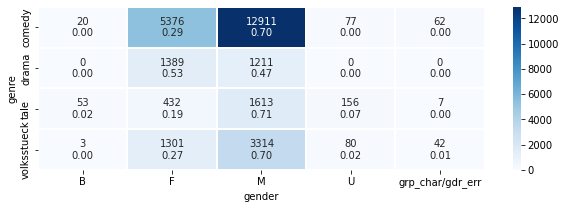

In [22]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,3))
sns.heatmap(pd.crosstab(df.genre, df.gender), annot=annots, fmt="", cmap="Blues", linewidths=.3)

### Class by genre

In [23]:
#sns.heatmap(pd.crosstab(df.genre, df.social_class), annot=True, fmt=".0f", cmap="Oranges")

<AxesSubplot:xlabel='social_class', ylabel='genre'>

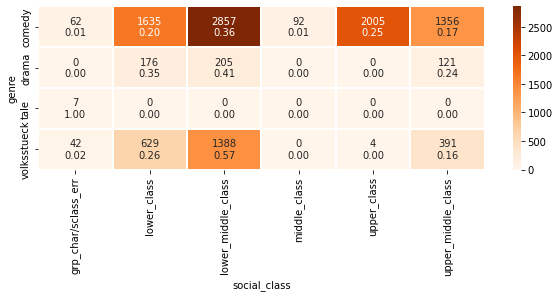

In [24]:
soc_class_by_genre = pd.crosstab(df.genre, df.social_class)
soc_class_by_genre_row_norm = pd.crosstab(df.genre, df.social_class, normalize='index')

soc_class_no_norm_labels = list(chain.from_iterable(soc_class_by_genre.values.tolist()))
soc_class_norm_by_rows_labels = list(chain.from_iterable(soc_class_by_genre_row_norm.values.tolist()))
soc_class_count_and_norm = list(zip(soc_class_no_norm_labels, soc_class_norm_by_rows_labels))
labels_soc_class_gender = [f"{x:.0f}\n{y:.2f}" for x, y in soc_class_count_and_norm]
annots_soc_class = np.asarray(labels_soc_class_gender).reshape(4, 6)


plt.figure(figsize=(10,3))
sns.heatmap(pd.crosstab(df.genre, df.social_class), annot=annots_soc_class, fmt="", cmap="Oranges", linewidths=.3)

#### Color by proportion of row total

<AxesSubplot:xlabel='social_class', ylabel='genre'>

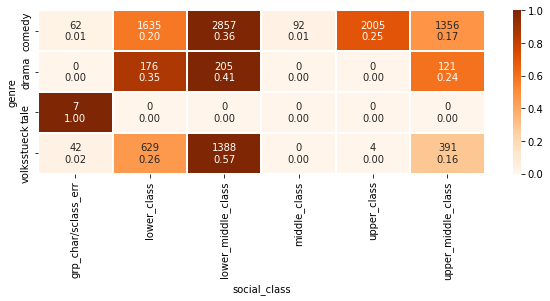

In [25]:
# heatmap with color by row (flip axes to have column-wise) https://stackoverflow.com/questions/42111075/
plt.figure(figsize=(10,3))
sns.heatmap(soc_class_by_genre.div(soc_class_by_genre.max(axis=1),axis=0), annot=annots_soc_class, fmt="", cmap="Oranges", linewidths=.3)

### Professional category by genre

In [26]:
#sns.heatmap(pd.crosstab(df.job_category, df.genre), annot=True, fmt=".0f", cmap="Purples")

<AxesSubplot:xlabel='genre', ylabel='job_category'>

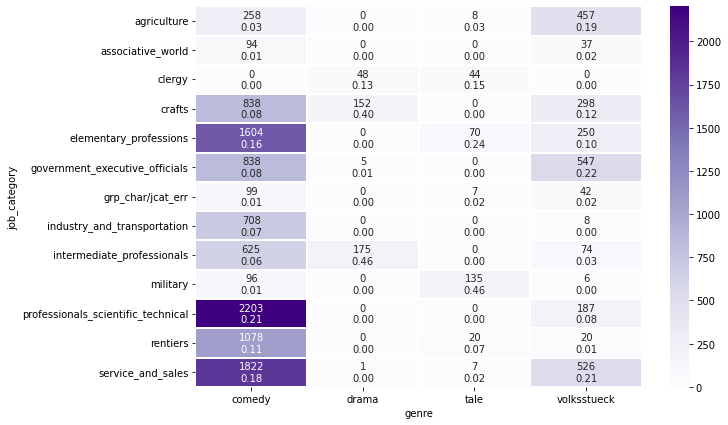

In [27]:
job_cat_by_genre = pd.crosstab(df.job_category, df.genre)
job_cat_by_genre_col_norm = pd.crosstab(df.job_category, df.genre, normalize='columns')

job_cat_no_norm_labels = list(chain.from_iterable(job_cat_by_genre.values.tolist()))
job_cat_norm_by_cols_labels = list(chain.from_iterable(job_cat_by_genre_col_norm.values.tolist()))
job_cat_count_and_norm = list(zip(job_cat_no_norm_labels, job_cat_norm_by_cols_labels))
labels_job_cat_gender = [f"{x}\n{y:.2f}" for x, y in job_cat_count_and_norm]
annots_job_cat = np.asarray(labels_job_cat_gender).reshape(13, 4)


plt.figure(figsize=(10,7))
sns.heatmap(pd.crosstab(df.job_category, df.genre), annot=annots_job_cat, fmt="", cmap="Purples", linewidths=.3)

#### Color by proportion of column total

<AxesSubplot:xlabel='genre', ylabel='job_category'>

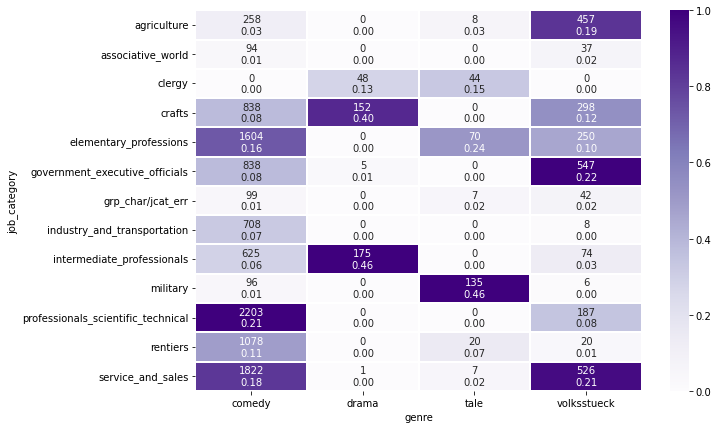

In [28]:
# heatmap with color by column (flip axes to have row-wise)
plt.figure(figsize=(10,7))
sns.heatmap(job_cat_by_genre.div(job_cat_by_genre.max(axis=0),axis=1), annot=annots_job_cat, fmt="", cmap="Purples", linewidths=.3)